In [ ]:
'''
This notebook is oriented to use an given dataset customized to contains 6 features and training a classification tree
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code

'''

In [26]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data


# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

features = pd.read_csv('MI_PRIMER_DATAFRAME.csv', encoding='latin-1', thousands=',')

print(features.head(5))

print('done')

   Unnamed: 0      Genre                                             Energy  \
0           0      Blues  [0.3897814555093646 0.39673966355621815 0.3558...   
1           1      Blues  [0.26089596189558506 0.49531740695238113 4.434...   
2           2  Classical  [0.29532113019376993 0.4797270493581891 0.5965...   
3           3  Classical  [0.4772881781682372 0.5201238235458732 0.54015...   

                                                RMSE    ZCR  \
0  [0.025204814970493317 0.027591519057750702 0.0...  55032   
1  [0.020222725346684456 0.02257348969578743 0.03...  37140   
2  [0.01891510561108589 0.024016642943024635 0.03...  65096   
3  [0.029024535790085793 0.030532008036971092 0.0...  58181   

                                               MFCCS  \
0  [[-1.9336070366197975 -1.8834505498807068 -1.5...   
1  [[-1.1961499510226592 -0.18357296362981235 0.5...   
2  [[0.36983636033343237 0.2697564760484705 -0.09...   
3  [[2.7708313747686577 2.1497897297951236 1.2895...   

       

In [27]:

#extracting labels and features

labelColumn = 'Genre'

labels = np.array(features[labelColumn])
print(np.unique(labels))

print("The labels of out dataset are:", labels)
print("And their shape is:", labels.shape)

# featureColumsToDrop = ['Artist', 'Title', 'ï»¿Index', 'Top Genre', 'Year']

featureColumsToDrop = ['Unnamed: 0', 'Genre']

features = features.drop(featureColumsToDrop, 1)

print("And their shape is:", features.shape)

features.head(5)

['Blues' 'Classical']
The labels of out dataset are: ['Blues' 'Blues' 'Classical' 'Classical']
And their shape is: (4,)
And their shape is: (4, 7)


,Energy,RMSE,ZCR,MFCCS,CQT,Spectral_Contrast,Chromagram
0,[0.3897814555093646 0.39673966355621815 0.3558...,[0.025204814970493317 0.027591519057750702 0.0...,55032,[[-1.9336070366197975 -1.8834505498807068 -1.5...,[[(-0.0433838152002823+0.000958286481885469j)\...,[[16.283316272798363 8.527449609472193 14.0448...,[[0.39496143483296 0.4000424521789117 0.404698...
1,[0.26089596189558506 0.49531740695238113 4.434...,[0.020222725346684456 0.02257348969578743 0.03...,37140,[[-1.1961499510226592 -0.18357296362981235 0.5...,[[(0.060693946006226844-0.0008416879257616376j...,[[17.106346851149127 9.897246956109093 11.4320...,[[0.3756684244644516 0.38222713662941254 0.389...
2,[0.29532113019376993 0.4797270493581891 0.5965...,[0.01891510561108589 0.024016642943024635 0.03...,65096,[[0.36983636033343237 0.2697564760484705 -0.09...,[[(0.02331991723333903+0.00012745053423541275j...,[[23.714079951930874 14.880712442653302 16.968...,[[0.4786743749860337 0.47880466815604644 0.478...
3,[0.4772881781682372 0.5201238235458732 0.54015...,[0.029024535790085793 0.030532008036971092 0.0...,58181,[[2.7708313747686577 2.1497897297951236 1.2895...,[[(0.02222964413995462+3.420030300093142e-05j)...,[[23.06533057141426 8.30871923415129 10.397142...,[[0.22708626208413377 0.22675069285319138 0.22...


In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


print(train_features['MFCCS'])

Training Features Shape: (3, 7)
Training Labels Shape: (3,)
Testing Features Shape: (1, 7)
Testing Labels Shape: (1,)
3    [[2.7708313747686577 2.1497897297951236 1.2895...
0    [[-1.9336070366197975 -1.8834505498807068 -1.5...
2    [[0.36983636033343237 0.2697564760484705 -0.09...
Name: MFCCS, dtype: object


In [22]:
# we must preprocessed length 
def replace_comma(array_list):
    column_processed = []
    for x in array_list:
        column_processed.append(x.replace('[', ''))
        column_processed.append(x.replace(']', ''))
    return column_processed

print(train_features['MFCCS'])
train_features['Energy'] = replace_comma(train_features['Energy'][1])
train_features['RMSE'] = replace_comma(train_features['RMSE'][1])
train_features['MFCCS'] = replace_comma(train_features['MFCCS'][1])
train_features['CQT'] = replace_comma(train_features['CQT'][1])
train_features['Spectral_Contrast'] = replace_comma(train_features['Spectral_Contrast'][1])
train_features['Chromagram'] = replace_comma(train_features['Chromagram'][1])

print(train_features['Energy'])


82     [[ 0.84418892  0.45419524 -0.28496727 ... -1.1...
991    [[ 0.15020328  0.17391046 -0.31399737 ...  0.0...
789    [[-0.94146695 -0.85022902 -0.26934265 ... -0.2...
894    [[ 1.03923889  0.88854168  0.26889905 ...  0.1...
398    [[-1.06140119 -1.50009896 -2.41077705 ... -1.3...
                             ...                        
106    [[ 0.9321798   0.73666941  0.34516582 ... -1.4...
270    [[-0.22141478 -0.32073141 -0.83721412 ...  0.6...
860    [[-1.12782771 -1.26173085 -1.50000763 ... -0.6...
435    [[-0.84893856 -1.1556205  -0.8488954  ...  0.9...
102    [[ 2.1644574   1.32793206  0.3069518  ... -0.0...
Name: MFCCS, Length: 750, dtype: object


ValueError: Length of values (142) does not match length of index (750)

In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)


ValueError: could not convert string to float: '[0.4772881781682372 0.5201238235458732 0.5401558522135019 ...\n 0.3673295322805643 0.18348674662411213 0.0185015881434083]'

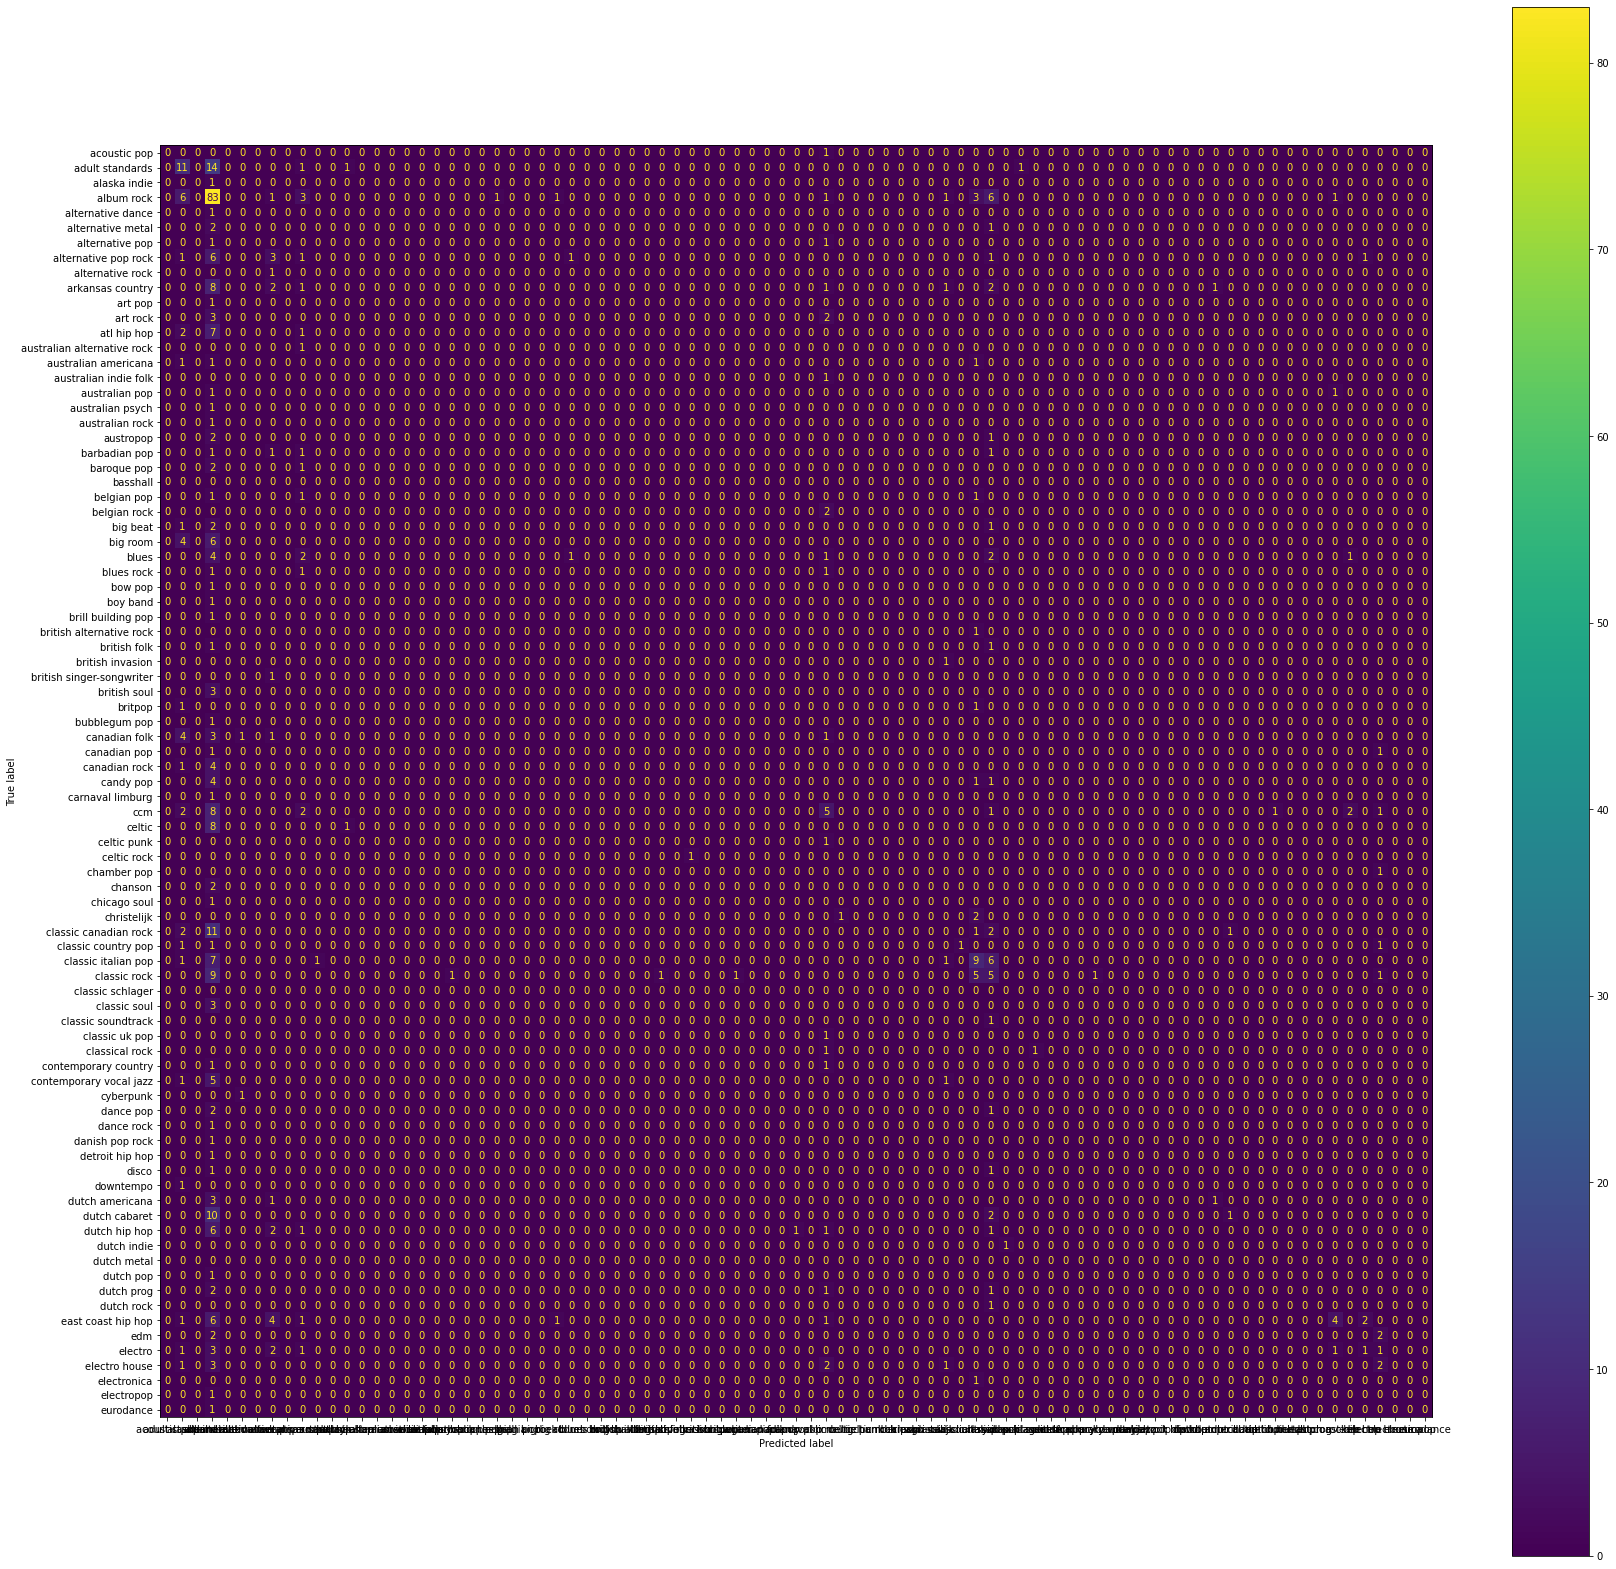

In [69]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure

# we must preprocessed length
test_features['Length (Duration)'] = replace_comma(test_features['Length (Duration)'])

predictions = rf.predict(test_features)

plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()